In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import os
import seaborn as sns
import numpy as np

In [2]:
data_folder = "../data"
filename = "pulsar_stars.csv"
data = pd.read_csv(os.path.join(data_folder, filename))
seed = 3208729
np.random.seed(seed)

In [3]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
data.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [5]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [6]:
data_for_plot = data.copy(deep=True)
data_for_plot['target_class'] = data_for_plot['target_class'].map(lambda x: 'not pulsar' if x == 0 else 'pulsar')
data_for_plot.columns = ['mu_ip', 'sigma_ip', 'kurtosis_ip', 'skewness_ip', 'mu_dmsnr', 'sigma_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target']
data_for_plot.head()

,mu_ip,sigma_ip,kurtosis_ip,skewness_ip,mu_dmsnr,sigma_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,not pulsar
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,not pulsar
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,not pulsar
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,not pulsar
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,not pulsar


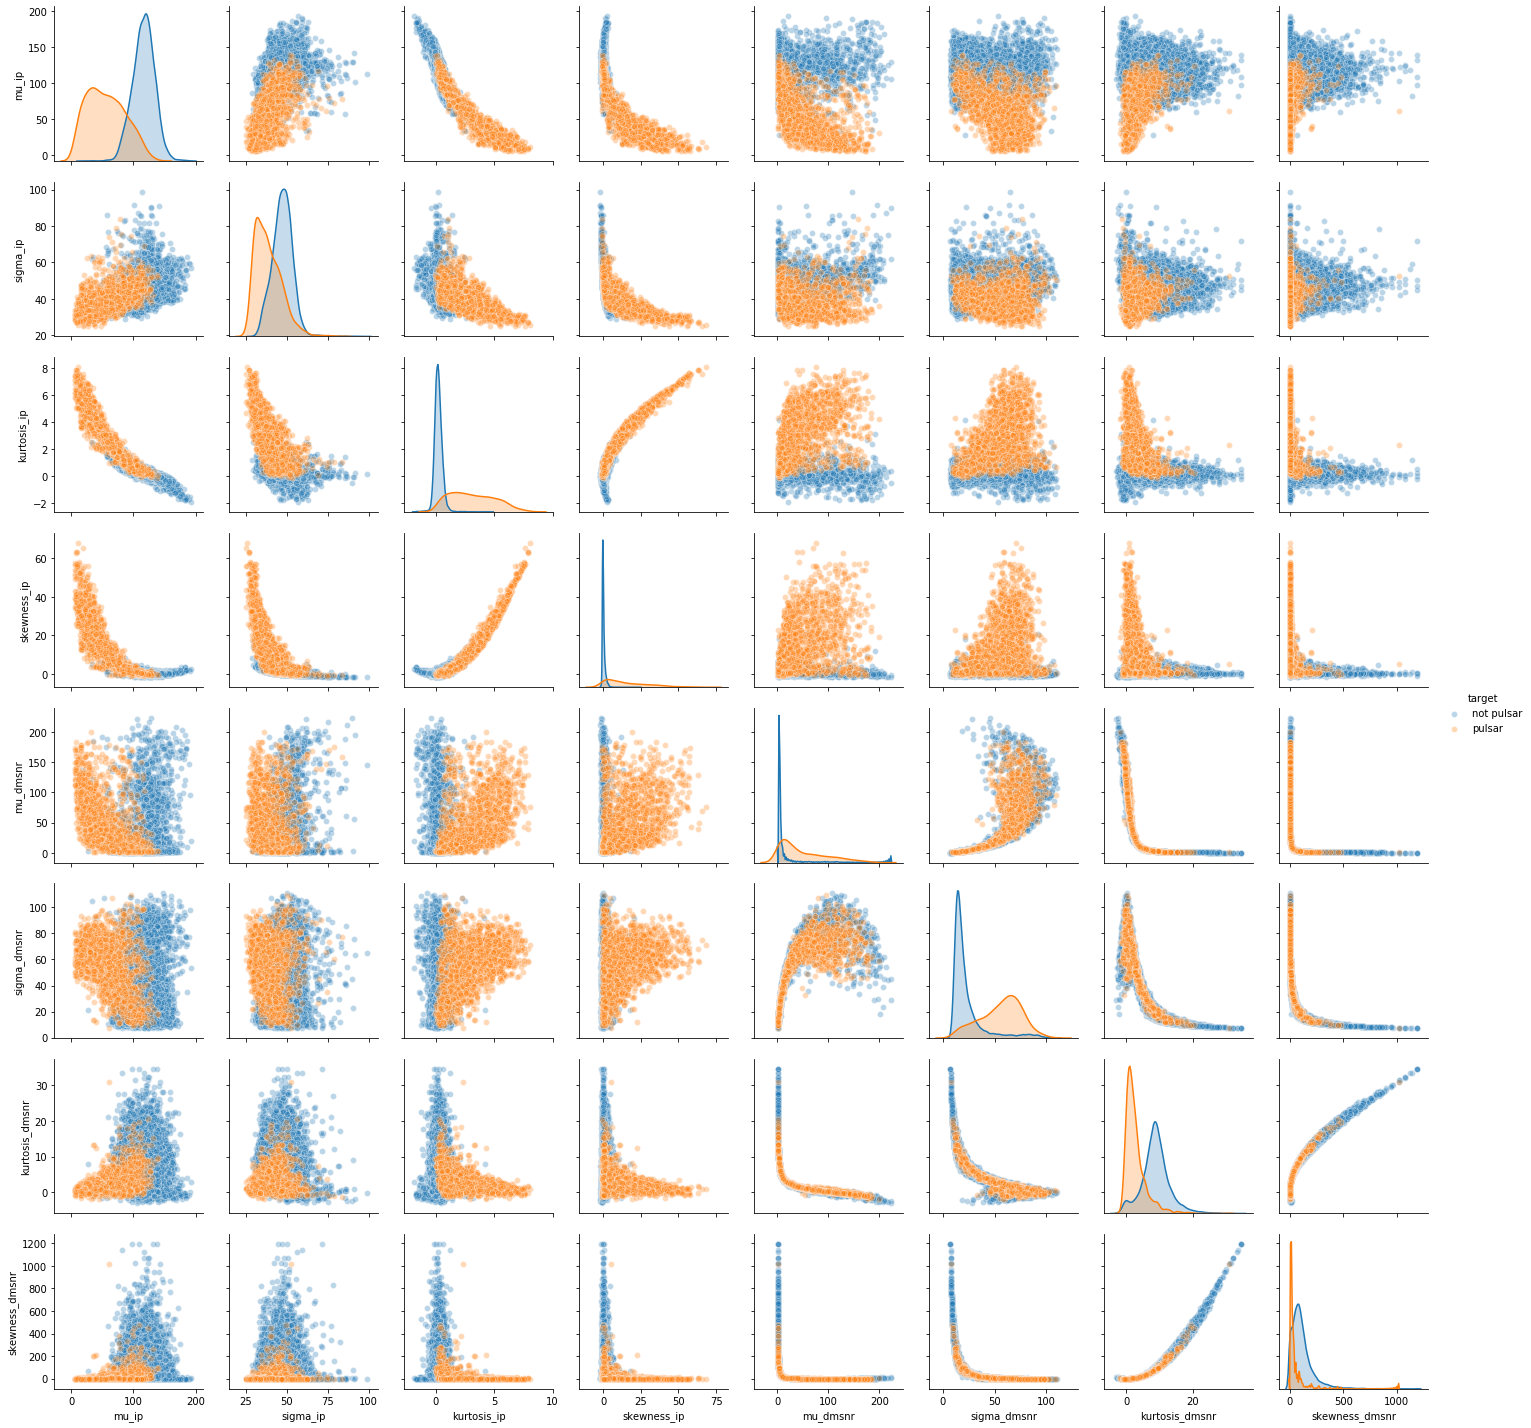

In [7]:
sns.pairplot(data_for_plot, hue="target", plot_kws={'alpha':0.3});
plt.savefig('pairplot.png')

In [8]:
data_for_plot['target'].value_counts()

not pulsar    16259
pulsar         1639
Name: target, dtype: int64

In [10]:
data_for_split = data_for_plot.copy(deep=True)
data_for_split['target'] = data['target_class']
fakes = data_for_split[data_for_split['target'] == 0]
pulsars = data_for_split[data_for_split['target'] == 1]

ttt_ratio = 0.8
fakes_train_size = int(ttt_ratio * len(fakes))
pulsars_train_size = int(ttt_ratio * len(pulsars))

fakes_permutation = np.random.permutation(len(fakes))
fakes_train = fakes.iloc[fakes_permutation[:fakes_train_size], :]
fakes_test = fakes.iloc[fakes_permutation[fakes_train_size:], :]

pulsars_permutation = np.random.permutation(len(pulsars))
pulsars_train = pulsars.iloc[pulsars_permutation[:pulsars_train_size], :]
pulsars_test = pulsars.iloc[pulsars_permutation[pulsars_train_size:], :]

train_data = pd.concat([fakes_train, pulsars_train]).sample(frac=1).reset_index(drop=True)
test_data = pd.concat([fakes_test, pulsars_test]).sample(frac=1).reset_index(drop=True)

train_data.to_csv(os.path.join(data_folder, "train_data.csv"), index=False)
test_data.to_csv(os.path.join(data_folder, "test_data.csv"), index=False)

In [11]:
fakes_train_size, pulsars_train_size

(13007, 1311)

In [12]:
train_data.head(30)

,mu_ip,sigma_ip,kurtosis_ip,skewness_ip,mu_dmsnr,sigma_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
0,119.070312,54.464321,0.082501,-0.167191,0.617893,9.939801,19.553781,429.015329,0
1,89.687500,43.502110,0.437278,0.466080,5.973244,31.325766,5.831691,34.735606,0
2,108.765625,43.813612,0.251548,0.227560,2.653846,20.597689,8.887964,84.319531,0
3,76.492188,38.122745,0.750549,2.556619,3.250000,22.389197,7.711294,62.916367,0
4,97.007812,49.176579,0.574170,0.269369,104.935619,99.374734,0.053575,-1.779702,0
5,127.851562,44.834956,0.123822,0.618086,9.893813,37.847029,3.983230,15.365900,0
6,10.078125,34.692986,5.602282,32.028671,71.388796,56.230803,1.183234,1.068631,1
7,43.898438,37.352384,3.253271,13.429517,15.428930,46.038400,3.119053,8.983716,1
8,133.632812,42.633956,0.013355,0.524493,163.316053,89.584756,-1.110123,-0.515951,0
9,136.148438,61.442566,-0.053924,-0.877518,2.379599,13.897067,9.420978,123.388400,0


In [14]:
test_data['target'].value_counts()

0    3252
1     328
Name: target, dtype: int64

In [38]:
from sklearn.decomposition import PCA
X = data_for_plot.iloc[:, :-1].values
print(X.shape)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

(17898, 8)


In [39]:
pca.explained_variance_ratio_

array([0.87105304, 0.07819344])

In [40]:
pca_data = pd.DataFrame()
pca_data["comp_1"] = X_pca[:, 0]
pca_data["comp_2"] = X_pca[:, 1]
pca_data["target"] = data_for_plot["target"]

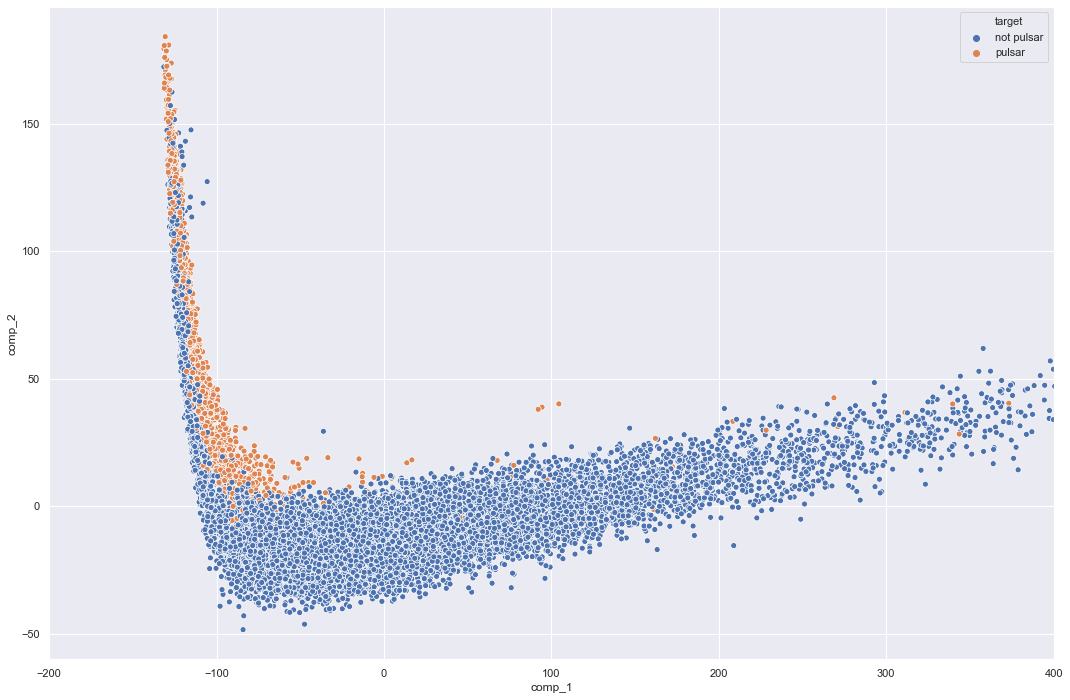

In [42]:
sns.set(rc={'figure.figsize':(18, 12)})
sns.scatterplot(x="comp_1", y="comp_2", hue="target", palette=[]data=pca_data);
plt.xlim(-200, 400);